In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy.signal import hilbert
print(scipy.__version__)

1.6.2


[ 0.91683032  1.1270414  -3.3309104  ... -0.56987675 -0.82754246
 -0.57092679]
48000
0.0008333506948061418
0.024999479166666668
-599.9875000000001


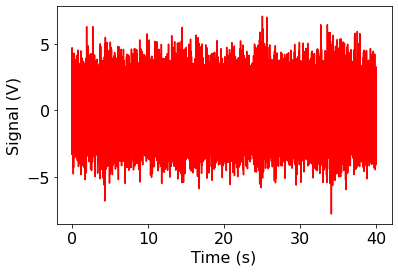

<Figure size 432x288 with 0 Axes>

In [96]:
#Plotting signal as function of time


signal = np.loadtxt('signal.mat')
print(signal)
duration = 40
N = len(signal)

print(N)
time = np.linspace(0,duration,N)
plt.plot(time, signal, color='red')
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Signal (V)", fontsize=16)
plt.figure()


delta_t = time[1]-time[0]
print(delta_t)

delta_f = 1/(N*delta_t)
print(delta_f)

freq_values = np.linspace(0, (N-1)*delta_f, N)
freq_values = freq_values - (N/2)*delta_f
print(freq_values[0])

48000


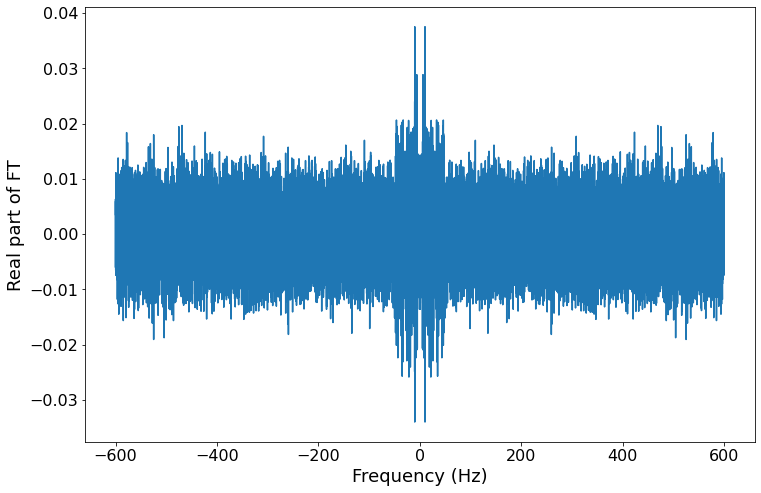

In [97]:
#Fourier transforming the signal
Fourier_Transform = np.fft.fft(signal)/N #normalising the FT
Fourier_Transform = np.fft.fftshift(Fourier_Transform) #shifting the FT so it is symmetric bout 0
print(len(Fourier_Transform))


fig = plt.figure(figsize = (12,8))
ax = plt.axes()

#ax.set_title('Signal in freq domain')
ax.set_xlabel('Frequency (Hz)',fontsize = 18)
ax.set_ylabel('Real part of FT',fontsize = 18)
ax.plot(freq_values, Fourier_Transform.real, )
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16) 
#ax.set_xlim([0, 90]) 
#ax.set_ylim([0, 0.04]) 
plt.savefig('Fourier_Transform')

plt.show()

[ 0.0090752 +0.j         -0.00189064+0.00164871j -0.00399737+0.01014891j
 ...  0.00289688+0.00295329j -0.0060394 +0.00339322j
  0.0063286 +0.0013982j ]
[0.00000000e+00 2.49994792e-02 4.99989583e-02 ... 5.99912502e+02
 5.99937501e+02 5.99962501e+02]


/Users/nathancrooks/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


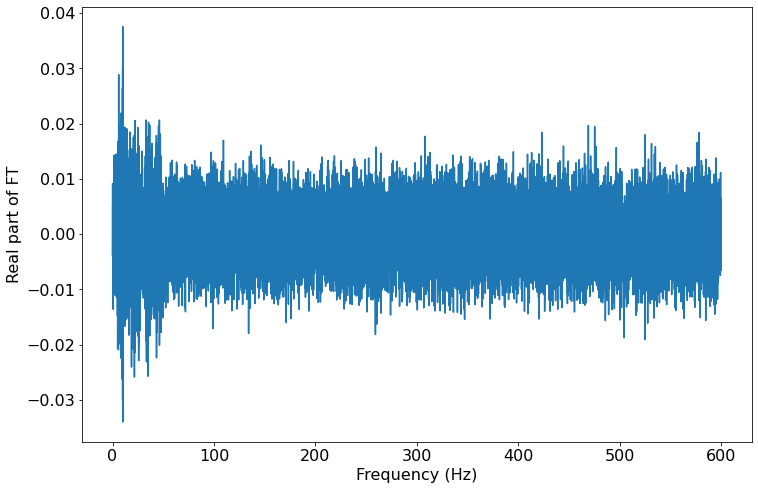

In [99]:
#Slicing the arrays so that we only view the positive frequencies as plot is symmetric 

FT_Pos = Fourier_Transform[int(len(Fourier_Transform)/2):]
print(FT_Pos)


freq_values_Pos = freq_values[int(len(freq_values)/2):]
print(freq_values_Pos)

fig = plt.figure(figsize = (12,8))
ax1 = plt.axes()


ax1.set_xlabel('Frequency (Hz)',fontsize = 16)
ax1.set_ylabel('Real part of FT',fontsize = 16)
ax1.plot(freq_values_Pos, FT_Pos, )
#ax1.set_xlim([0, 70]) 
#ax1.set_ylim([0, 0.04]) 

plt.show()

In [100]:
#Finding frequency relating to highest peak in range 0-8 Hz

ind1 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#max positive frequency is 600Hz but want to check in range 0-8 so need to check,
#, arrays from index (4*len(FT_Pos)/600) to index (8*len(FT_Pos)/600) --> 160 to 320

for i in range (int(4*len(FT_Pos)/600), int(8*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind1 = i
#print the index of maximum element
print("The highest peak of FT in range 4-8Hz is: ",FT_Pos[ind1].real)
print("The associated frequency of the highest peak of FT in range 4-8Hz is: ",freq_values_Pos[ind1])

#Finding frequency relating to highest peak in range 8-13 Hz

ind2 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 8-13Hz so need to check arrays from,
#, index (8*len(FT_Pos)/600) to index (13*len(FT_Pos)/600 ) --> 320 to 520

for i in range (int(8*len(FT_Pos)/600), int(13*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind2 = i
#print the index of maximum element
print("The highest peak of FT in range 8-13Hz is: ",FT_Pos[ind2].real)
print("The associated frequency of the highest peak of FT in range 8-13Hz is: ",freq_values_Pos[ind2])

#Finding frequency relating to highest peak in range 13-30 Hz

ind3 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 13-30Hz so need to check arrays from,
#, index (13*len(FT_Pos)/600 ) to index (30*len(FT_Pos)/600) --> 520 to 1200

for i in range (int(13*len(FT_Pos)/600), int(30*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind3 = i
#print the index of maximum element
print("The highest peak of FT in range 13-30Hz is: ",FT_Pos[ind3].real)
print("The associated frequency of the highest peak of FT in range 13-30Hz is: ",freq_values_Pos[ind3])

#Finding frequency relating to highest peak in range 30-50 Hz

ind4 = 0    #ind variable to store the index of maximum value in the list
max_element = FT_Pos[0]

#now want to check in range 30-50Hz so need to check arrays from,
#, index (30*len(FT_Pos)/600 ) to index (50*len(FT_Pos)/600) --> 1200 to 2000

for i in range (int(30*len(FT_Pos)/600), int(50*len(FT_Pos)/600)): #iterate over array
    if FT_Pos[i] > max_element: #to check max value
        max_element = FT_Pos[i]
        ind4 = i
#print the index of maximum element
print("The highest peak of FT in range 30-50Hz is: ",FT_Pos[ind4].real)
print("The associated frequency of the highest peak of FT in range 30-50Hz is: ",freq_values_Pos[ind4])

#These values printed correspond to the frequency for the highest peak in each of the,
#, four ranges 0-10 seconds(4-8Hz), 10-20 seconds(8-13Hz), 20-30 seconds(13-30Hz)
#, and 30-40 seconds(30-50Hz) 
#I knew to check within these ranges as in the task sheet we were given,the frequency 
#, band that the dominant signal was within for each corresponding time interval



The highest peak of FT in range 4-8Hz is:  0.028863926524022875
The associated frequency of the highest peak of FT in range 4-8Hz is:  6.099872916666641
The highest peak of FT in range 8-13Hz is:  0.037543917082853734
The associated frequency of the highest peak of FT in range 8-13Hz is:  10.074790104166595
The highest peak of FT in range 13-30Hz is:  0.02058047844406685
The associated frequency of the highest peak of FT in range 13-30Hz is:  22.249536458333296
The highest peak of FT in range 30-50Hz is:  0.02066360520547931
The associated frequency of the highest peak of FT in range 30-50Hz is:  32.9243140625


In [113]:
# Looping the bandpass filters

# Define parameters of bandpass filter 
a = 0.08
c = 1
x = np.linspace(-600,600,len(Fourier_Transform)) 
FT_bandpass = np.zeros(len(Fourier_Transform))
array_stack = np.zeros((600, len(Fourier_Transform))) # array to store all 600 different filtered signals


for i in range(600):
    
    counter = i% 100 #tracks progress of code 
    if counter == 0:
        print(i)
        
    #formula for band pass filter (BPF), value BPF is centred on increases by 1Hz each time going from 0-600 Hz 
    band_pass = a*np.exp((-(x-i)**2)/(2*c**2)) 
    for j in range(len(FT_bandpass)):
        FT_bandpass[j] = Fourier_Transform[j] * band_pass[j] #applies band pass to FT signal
        
    signal_filtered = np.fft.irfft(FT_bandpass) #performs inverse fourier transform to return to timme domain
    
    #slicing arrays in half as real inverse fourier transform function apppears to produce an array double,
    #, the size than it should be. It appears that the array gets copied and mirrored as when plotted,
    #, they produce the symmetrical plot
    signal_filtered = signal_filtered[:48000]   
    analytic_signal = hilbert(signal_filtered) # performing hilbert transform then taking absolute value 
    amplitude_envelope = np.abs(analytic_signal) 
    array_stack[i,j] = amplitude_envelope[j] #recording signal in array
    

0


<ipython-input-113-0eb7a7b5da63>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  FT_bandpass[j] = Fourier_Transform[j] * band_pass[j]


100
200
300
400
500


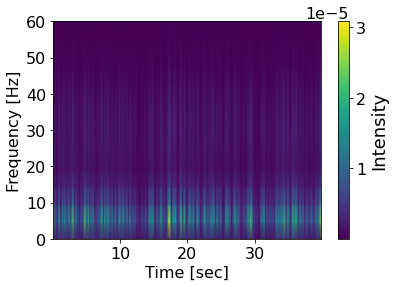

In [114]:
from scipy import signal
stack = np.zeros(len(amplitude_envelope))
for i in range(600):
    stack += array_stack[i]

fs = 1200
f, t, Sxx = signal.spectrogram(stack, fs)
plt.pcolormesh(t, f, np.cbrt(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]',fontsize = 16)
plt.xlabel('Time [sec]',fontsize = 16)
plt.colorbar().set_label(label='Intensity',size=18)
plt.ylim([0,60])
plt.show()

0
100
200
300
400
500


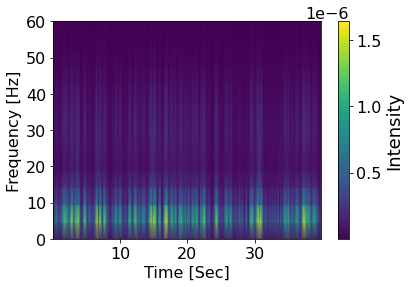

In [115]:
from scipy import signal
for i in range(600):

    counter = i% 100 # tracks progress of code
    if counter == 0:
        print(i)
    #plots 
    envelope = array_stack[i]
    f, t, Sxx = signal.spectrogram(envelope, fs)
    plt.pcolormesh(t, f, np.cbrt(Sxx), shading='gouraud')
    plt.ylim([0,60])
    
plt.ylabel('Frequency [Hz]',fontsize = 16)
plt.xlabel('Time [Sec]',fontsize = 16)
plt.colorbar().set_label(label='Intensity',size=18)
